In [1]:
!pip install pandas scikit-learn matplotlib tensorflow torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 833.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 35.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 9.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.3 MB/s eta 0:0

In [2]:
import numpy as np
np.random.seed(0)

In [3]:
import pandas as pd

df = pd.read_csv("uwb_cir.csv")

In [4]:
df.head()

,timestamp,my_id,from_id,to_id,idx,cir
0,0.241975,10,11,5,748.296021,"[14, 68, 66, 28, 151, 155, 104, 77, 79, 51, 68..."
1,0.365864,11,11,2,749.312012,"[42, 13, 45, 27, 48, 76, 117, 7, 26, 36, 94, 6..."
2,0.498165,11,11,3,750.546021,"[69, 106, 224, 188, 54, 68, 117, 182, 68, 155,..."
3,0.613199,10,11,3,745.656006,"[37, 78, 133, 67, 165, 62, 9, 108, 85, 176, 80..."
4,0.737375,11,11,0,744.265015,"[126, 104, 21, 74, 57, 85, 94, 41, 147, 33, 30..."


In [36]:
import numpy as np
X_data = []
y_data = []

for i in range(df.shape[0]):
    X_data.append(eval(df["cir"][i]))
    target = 1 if df["to_id"][i] in [1,3,4] else 0
    y_data.append(target)

y_data = np.asarray(y_data)

In [37]:
from sklearn.preprocessing import normalize

X_data_time = normalize(X_data)

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_time, y_data, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Test accuracy: 0.5786516853932584


In [39]:
from tensorflow import keras


In [90]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv1D(3, 32, input_shape=(1016,1), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(3, 32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_45 (Conv1D)              │ (None, 985, 3)         │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 985, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_46 (Conv1D)              │ (None, 954, 3)         │           291 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 954, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 2862)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       183,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,847 (733.78 KB)

 Trainable params: 187,847 (733.78 KB)

 Non-trainable params: 0 (0.00 B)

None


In [91]:
from keras import optimizers

model.compile(optimizers.Adam(1e-4), loss="bce", metrics=["acc"])
summary = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5231 - loss: 0.6929 - val_acc: 0.5899 - val_loss: 0.6896
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5654 - loss: 0.6893 - val_acc: 0.5899 - val_loss: 0.6850
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5402 - loss: 0.6889 - val_acc: 0.5899 - val_loss: 0.6830
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5531 - loss: 0.6862 - val_acc: 0.5899 - val_loss: 0.6799
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5686 - loss: 0.6829 - val_acc: 0.5899 - val_loss: 0.6782
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5380 - loss: 0.6851 - val_acc: 0.5899 - val_loss: 0.6769
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5407 - loss: 0.6829 - val_acc: 0.5955 - val_loss: 0.6757
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5532 - loss: 0.6779 - val_acc: 0.5899 - val_loss: 0.6756
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5466 

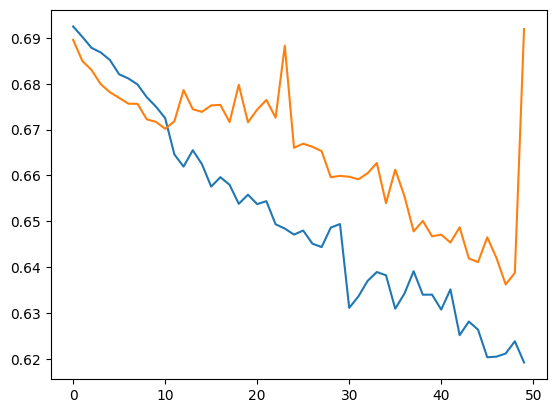

In [92]:
import matplotlib.pyplot as plt

plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])

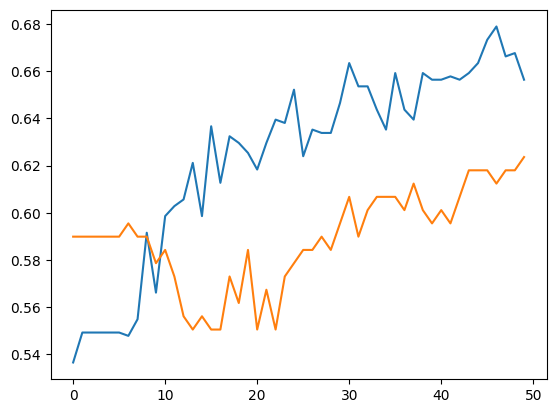

In [93]:
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])

In [94]:
!pip install scipy


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [138]:
X_data_fft = np.fft.fft(X_data)
X_data_fft = np.real(X_data_fft)
X_data_fft = normalize(X_data_fft)

X_train, X_test, y_train, y_test = train_test_split(X_data_fft, y_data, test_size=0.2, random_state=42)


In [139]:
model = models.Sequential()
model.add(layers.Conv1D(3, 32, input_shape=(1016,1), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(3, 32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_53 (Conv1D)              │ (None, 985, 3)         │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 985, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_54 (Conv1D)              │ (None, 954, 3)         │           291 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 954, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2862)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │       183,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,847 (733.78 KB)

 Trainable params: 187,847 (733.78 KB)

 Non-trainable params: 0 (0.00 B)

None


In [140]:
model.compile(optimizers.Adam(1e-4), loss="bce", metrics=["acc"])
summary = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5068 - loss: 0.6930 - val_acc: 0.5899 - val_loss: 0.6908
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5627 - loss: 0.6904 - val_acc: 0.5899 - val_loss: 0.6869
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5215 - loss: 0.6905 - val_acc: 0.5899 - val_loss: 0.6823
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5228 - loss: 0.6899 - val_acc: 0.5899 - val_loss: 0.6799
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5482 - loss: 0.6856 - val_acc: 0.5899 - val_loss: 0.6793
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5594 - loss: 0.6840 - val_acc: 0.5899 - val_loss: 0.6779
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5496 - loss: 0.6839 - val_acc: 0.5899 - val_loss: 0.6770
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5411 - loss: 0.6845 - val_acc: 0.5899 - val_loss: 0.6769
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.5509

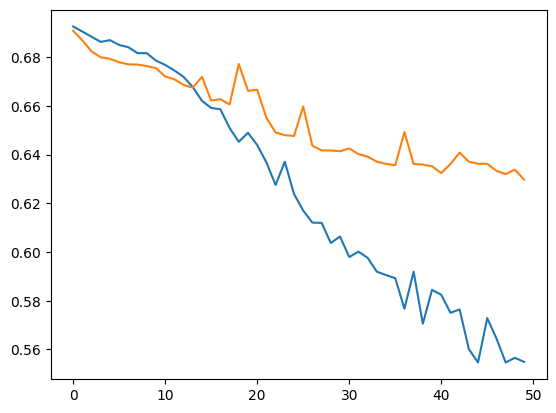

In [141]:
import matplotlib.pyplot as plt

plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])

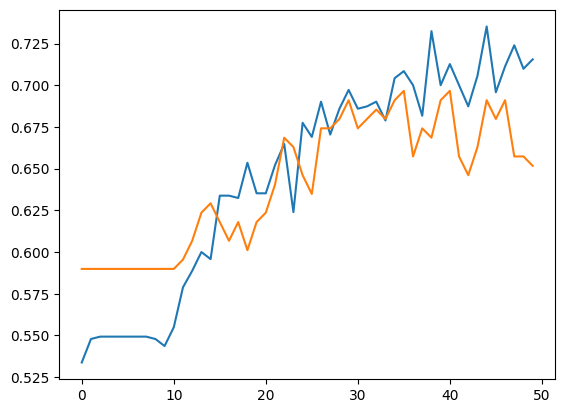

In [142]:
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])

In [115]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [134]:
import pywt

def time_to_coeffs(X_item):
    wavelet = "morl"
    # logarithmic scale for scales, as suggested by Torrence & Compo:
    widths = np.geomspace(1, 1024, num=200)
    # sampling_period = np.diff(time).mean()
    chirp = X_item
    cwtmatr, freqs = pywt.cwt(chirp, widths, wavelet)
    cwtmatr = np.real(cwtmatr)
    return cwtmatr

In [136]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 570.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [152]:
import tqdm

X_data_cwt = []
for X in tqdm.tqdm(X_data):
    X_data_cwt.append(time_to_coeffs(X))

100%|██████████| 888/888 [00:58<00:00, 15.15it/s]


In [153]:
import tensorflow as tf

X_data_cwt_normalized = tf.keras.utils.normalize(
    X_data_cwt, axis=-1, order=2
)

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([707, 239, 381, 791, 682, 118, 286, 312,  29,  55, 412, 593, 300,
       363,  81, 694, 370, 554, 477, 779, 723, 408, 260, 533, 514, 760,
       499, 711, 809, 494, 309, 603, 487, 244, 467, 765,   7, 231, 155,
       704, 424, 101, 199, 398, 668, 375, 457, 731, 506, 828,   2, 355,
       501, 259, 622, 158, 516, 827, 812, 328, 585, 685, 431, 521, 715,
       352, 482, 658, 652, 212, 448,  79, 148, 835,  60, 539, 874, 798,
       377, 326, 133, 462, 542, 464, 453, 631, 692, 740, 429, 485, 292,
       172, 449, 360, 331, 799,  90, 832, 181, 468, 793,  69, 131, 333,
       680, 135, 164,  28, 493, 193, 486, 710, 838, 380, 140, 173,   6,
       575, 444,  73, 669, 327, 662, 145, 234, 220, 525, 388, 132, 819,
       323, 185,  41, 545, 108, 420,  56, 321, 346, 495,  24, 350, 428,
       433,  51, 751, 814, 567, 264, 886, 611, 409, 351,  18, 706, 338,
        83,  61, 272, 285, 357, 734,  12, 182, 405, 629, 223, 512, 626,
       390, 635, 522, 544, 176, 598, 440, 163, 248, 568, 785,  74, 113,
       596, 532, 104, 114, 367,  92, 547,  89, 336, 876, 815, 826, 541,
       675,  94,  11, 430,  43,  42, 329, 167, 777, 535, 766, 866, 178,
       581, 845, 591, 177, 606, 708, 613, 383, 257, 436, 335, 549,  15,
         3, 691, 256, 450, 595, 863, 393, 222, 523, 451, 602, 324, 528,
         9, 249,  22, 356, 221, 599, 764, 871, 526, 340, 741, 518, 203,
       237,  93, 483, 439, 557, 284, 184, 717, 478, 153,  75, 788, 548,
       277,  68, 713, 188, 271, 660, 735, 236,  88, 755, 117, 125, 802,
       289, 238,   0, 878, 877, 774, 395, 529, 126, 278, 689, 116, 228,
       620, 653, 817, 823, 274, 318, 604, 144, 696, 714, 807, 640, 369,
       268, 621, 307, 423, 310, 354,  46, 349, 371, 479, 732, 261, 195,
       887, 742, 107, 864,  59, 656, 263, 841, 100, 443, 490, 605, 797,
       638, 169, 179, 304, 341,  57, 856, 149, 124, 792,  50, 353, 821,
       142, 470, 399, 852, 320,  19, 722, 705, 407, 709,  38, 175, 245,
       746, 829, 672, 762, 154, 287, 538,  17, 127, 322, 255, 590, 854,
       190, 115, 551, 180, 301, 677, 636, 773, 879, 594, 517, 872,  45,
       862, 157, 684, 171,  16, 511,  48, 885, 853, 515, 615, 480, 283,
       587, 225,  26, 697, 437, 842, 364, 229,  37, 855, 374, 469, 857,
       756, 649, 194, 758, 767, 503, 859, 739, 579, 858, 162, 628, 152,
       623, 695, 673, 111, 226, 616, 103, 421, 419, 586, 119,  53, 151,
       403, 837, 207, 750, 679,   8, 720,  36, 452, 253, 303, 665, 571,
       634, 643, 262, 610, 297, 414, 150, 703, 787, 550, 488, 147, 146,
       644, 824, 659, 348, 463, 325, 186, 123, 757, 608, 143, 849, 197,
       609, 279, 293, 400, 122, 183, 202, 438, 246, 415, 786, 129, 637,
       402, 846, 687, 808, 219, 641, 810, 670, 813, 624, 745, 678, 386,
       861, 509, 267, 730, 441, 496, 112, 232, 772, 607, 671, 373, 870,
       749, 233, 881, 676, 317, 648, 410, 796, 358, 258, 627, 632, 282,
       376, 384, 224, 844, 794, 472, 347, 505, 639, 875, 822, 801, 619,
       759, 645, 752, 556, 848, 577,  85, 242, 698, 159, 524,  35, 540,
       170, 654, 761, 753, 836,  95, 563, 240, 574, 690, 460, 553, 778,
       206, 392, 397, 754, 217,   4, 642, 795, 612, 738, 546, 725, 683,
        98, 727, 573, 406, 502,  47,  32, 200, 134,  27, 780, 230, 489,
       378, 288, 418, 674, 391, 592, 498, 138,  62, 471, 647, 128, 865,
       520,  64,  14, 156,  40, 492, 379, 187, 763, 216,  52, 337, 748,
       719, 724, 295, 701, 251, 726, 461, 455, 884, 269, 201, 161, 555,
       729, 401, 702, 476, 771, 105, 565, 389,   1, 830, 561,  80, 205,
        34, 775, 508, 427, 454, 366,  91, 339, 564, 345, 776, 241,  13,
       315, 600, 387, 273, 166, 880, 646, 818, 484, 869, 504, 831, 243,
       566, 562, 686, 189, 782, 699, 475, 681, 510,  58, 474, 560, 747,
       252,  21, 313, 459, 160, 276, 191, 385, 805, 413, 491, 343, 769,
       308, 661, 130, 663,  99, 372,  87, 458, 330, 214, 466, 121, 614,
        20, 700,  71, 106, 270, 860, 435, 102])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X_data_cwt_normalized), y_data, test_size=0.2, random_state=42)

In [159]:
model = models.Sequential()
model.add(layers.Conv2D(3, 32, input_shape=(1016,200,1), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(3, 32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 985, 169, 3)    │         3,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 985, 169, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 954, 138, 3)    │         9,219 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 954, 138, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 394956)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │    25,277,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,293,767 (96.49 MB)

 Trainable params: 25,293,767 (96.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [162]:
model.compile(optimizers.Adam(1e-4), loss="bce", metrics=["acc"])
summary = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=2)

Epoch 1/5
  9/355 ━━━━━━━━━━━━━━━━━━━━ 30:46 5s/step - acc: 0.5607 - loss: 0.6724

KeyboardInterrupt: 

In [164]:
import torch




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.p